# 3 - Item Response Theory with `mirt`

[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/annabavaresco/ancm2024/blob/main/docs/week_3/Item_Response_Theory_with_R.ipynb)
[![View filled in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/annabavaresco/ancm2024/blob/main/docs/week_3/Item_Response_Theory_with_R.ipynb)

*This notebook was adapted from materials created by Philipp Masur in 2022*

---

In this computer lab we'll learn to fit item response theory
(IRT) models with the R package `mirt` (multidimensional item response
theory, version 1.36.1; Chalmers, 2022, [CRAN
page](https://cran.r-project.org/web/packages/mirt/index.html)). This notebook doesn't require prior knowledge of R and should be accessible to anyone familiar with other programming languages. However, if you find yourself struggling with the syntax, feel free to reach out to the TA and ask for help :) Also, Google Colab does support R, but make sure you go to Runtime > Change Runtime Type and select R before running the code. 

IRT refers to a set of mathematical models which aim to explain the
relationship between a latent ability, trait, or proficiency (denoted
![\\theta](https://latex.codecogs.com/png.latex?%5Ctheta "\theta")) and
its observable manifestations (e.g., multiple-choice questions,
true-false items, items…). IRT focuses on the pattern of responses and considers responses in
probabilistic terms, rather than focusing on composite variables and
linear regression theory. IRT thereby accounts for:

-   *item discrimination*: ability of an item to differentiate between
    respondents with different levels of proficiency.
-   *item difficulty*: the likelihood of a correct response, expressed
    as the proficiency level at which 50% of the participant sample is
    estimated to answer an item correctly.
-   depending on the model, some other parameters, for example, *guessing
    probability*…

Assessing item difficulties is useful in matching the test and trait
levels of a target population and in ensuring that the entire range of
the proficiency is covered. Therefore, there are several advantages to
IRT models:

1.  The stronger focus on item difficulty generally leads to scales that
    perform better at differentiating at the extremes of proficiency.

2.  Item banks that are developed using IRT often provide a good basis
    for creating smaller scales or parallel tests that still exhibit a
    high validity and reliability.

3.  It allows for computer adaptive testing (CAT). This approach can
    greatly improve the efficiency of testing. In CAT, the test items
    are selected to match each individual’s proficiency, so that they will not be bored by easy items or frustrated by overly
    difficult items.

4.  Specific IRT models (e.g., the Rasch model, see further below) has
    specific mathematical properties that are highly desirable, such
    as a) the number-correct score is a sufficient estimation of
    ![\\theta](https://latex.codecogs.com/png.latex?%5Ctheta "\theta"), b)
    specific objectivity, which means that item and person parameters
    will be similar even if only a subset of the item pool is used or a
    different population is studied.

This notebook aims to cover the main models used in IRT
and discuss their properties. The models we will cover here are:
the 3PL model, the 2PL model, and finally the 1PL or Rasch model. These
models are named by the number of item parameter used in the function
that models the relationship between
![\\theta](https://latex.codecogs.com/png.latex?%5Ctheta "\theta") and
the item response (0/1). Each model has unique properties but all of
them are suited to estimate latent variables from binary items (e.g.,
knowledge tests), which we will deal with in this tutorial.


## Preparation and Data

Although we are going to focus on the the package `mirt` in this
tutorial, there are actually several packages that can be used to
estimated IRT models. The most common ones are
[`ltm`](https://cran.r-project.org/web/packages/ltm/index.html),
[`eRm`](https://cran.r-project.org/web/packages/eRm/index.html), or
[`TAM`](https://cran.r-project.org/web/packages/TAM/index.html). This
article by Choi & Asilkalkan (2019) also provides an overview of all
available packages and their specific advantages:
<https://doi-org.vu-nl.idm.oclc.org/10.1080/15366367.2019.1586404>.

For this tutorial, we are going to load the `tidyverse` (for data
wrangling and visualization) and `mirt` (for the main IRT analyses). We'll also be using the package `ggmirt`, which represents an
extension to `mirt` and provides functions to plot more
publication-ready figures and helps to assess item, person, and model
fit.


In [ ]:
# Data wrangling
library(tidyverse)

# Very comprehensive package for IRT analyses
library('devtools')
install_github('philchalmers/mirt')
library(mirt)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: usethis




R.methodsS3  (NA -> 1.8.2   ) [CRAN]
R.oo         (NA -> 1.26.0  ) [CRAN]
parallelly   (NA -> 1.38.0  ) [CRAN]
listenv      (NA -> 0.9.1   ) [CRAN]
globals      (NA -> 0.16.3  ) [CRAN]
future       (NA -> 1.34.0  ) [CRAN]
audio        (NA -> 0.1-11  ) [CRAN]
R.utils      (NA -> 2.12.3  ) [CRAN]
progressr    (NA -> 0.14.0  ) [CRAN]
future.apply (NA -> 1.11.2  ) [CRAN]
RPushbullet  (NA -> 0.3.4   ) [CRAN]
pbapply      (NA -> 1.7-2   ) [CRAN]
beepr        (NA -> 2.0     ) [CRAN]
snow         (NA -> 0.4-4   ) [CRAN]
RcppArmad... (NA -> 14.0.0-1) [CRAN]
permute      (NA -> 0.9-7   ) [CRAN]
SimDesign    (NA -> 2.17.1  ) [CRAN]
dcurver      (NA -> 0.9.2   ) [CRAN]
Deriv        (NA -> 4.1.3   ) [CRAN]
vegan        (NA -> 2.6-8   ) [CRAN]
gridExtra    (NA -> 2.3     ) [CRAN]
GPArotation  (NA -> 2024.3-1) [CRAN]


Installing 22 packages: R.methodsS3, R.oo, parallelly, listenv, globals, future, audio, R.utils, progressr, future.apply, RPushbullet, pbapply, beepr, snow, RcppArmadillo, permute, SimDesign, dcurver, Deriv, vegan, gridExtra, GPArotation

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpSvGfJT/remotesc75169200a/philchalmers-mirt-7bdb728/DESCRIPTION’ ... OK
* preparing ‘mirt’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘mirt/dev’
Removed empty directory ‘mirt/tests/tests/testdata’
* building ‘mirt_1.42.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: stats4

Loading required package: lattice



In [ ]:
# Extension for 'mirt'
install_github("masurp/ggmirt")
library(ggmirt)


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpSvGfJT/remotesc75fc2ef15/masurp-ggmirt-4cfa106/DESCRIPTION’ ... OK
* preparing ‘ggmirt’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ggmirt_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The `ggmirt` package includes a convenient function to simulate data for
IRT analyses. Let’s quickly create a data set with 500 observations and
10 items that should fit a 3PL, 2PL and perhaps even a 1PL model.

In [ ]:
# setting seed for reproducibility
set.seed(42)
d <- sim_irt(500, 10, discrimination = .25, seed = 42)
head(d)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.
ℹ The deprecated feature was likely used in the ggmirt package.
  Please report the issue to the authors.”


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,1,0,1,1,1,0,1
0,1,1,0,0,0,0,0,0,1
0,1,0,1,0,1,0,1,0,0
0,0,1,0,0,1,0,0,0,1
0,1,1,1,0,0,1,1,1,0
0,0,1,0,0,0,0,1,0,1


As you can see, each "participant" has answered binary 10 items. Imagine we had administered a test (e.g., LSAT, PISA,
knowledge test, exam,…) to 500 people. The score 1 means a person has
answered a particular question/item *correctly*. The score 0 means the item was answered incorrectly.

## 3PL model

The 3PL model takes item discrimination (first parameter: *a*), item
difficulty (second parameter: *b*), and guessing probability (third
parameter: *c*) into account. As such, the 2PL and 1PL model (discussed
below) are special cases, or constrained versions of the 3PL model.
Take a look at Fig. 1 below. It shows a typical item characteristic
curve (ICC, but not to be mistaken for the intra-class correlation). The
x-axis shows the latent ability
(![\\theta](https://latex.codecogs.com/png.latex?%5Ctheta "\theta"))
ranging from -4 to 4, with 0 being the average ability in the studied
population. The y-axis shows the probability of solving the item. The
curve thus represents the probability of answering this item given a
certain level on the latent ability.

![](https://github.com/ccs-amsterdam/r-course-material/blob/master/tutorials/R_test-theory_3_irt_files/figure-gfm/unnamed-chunk-3-1.png?raw=true)

In this example, this 3PL model provides a smooth curve for this item
because it is based on item discrimination (steepness of the slope),
difficulty (point of inflexion at which the probability of answering the
item correctly is 50%) and the guessing probability (slightly raised
lower asymptote). The mathematical form of the 3PL model is:

![P(\\theta\_j) = c\_i + (1-c\_i)\\frac{e^{1.7a\_i(\\theta\_j-b\_i)}}{1+e^{1.71a\_i(\\theta\_j-b\_i)}}](https://latex.codecogs.com/png.latex?P%28%5Ctheta_j%29%20%3D%20c_i%20%2B%20%281-c_i%29%5Cfrac%7Be%5E%7B1.7a_i%28%5Ctheta_j-b_i%29%7D%7D%7B1%2Be%5E%7B1.71a_i%28%5Ctheta_j-b_i%29%7D%7D "P(\theta_j) = c_i + (1-c_i)\frac{e^{1.7a_i(\theta_j-b_i)}}{1+e^{1.71a_i(\theta_j-b_i)}}")

Here, the probability of a correct response
![P(\\theta)](https://latex.codecogs.com/png.latex?P%28%5Ctheta%29 "P(\theta)")
given a person’s ability
![\\theta](https://latex.codecogs.com/png.latex?%5Ctheta "\theta") is
expressed as a function of all three item parameters and a person’s
ability, where ![i](https://latex.codecogs.com/png.latex?i "i")
indicates the item and ![j](https://latex.codecogs.com/png.latex?j "j")
indicates an individual person. In the figure, the steeper the slope,
the better the item is at differentiating people clearly in close
proximity to its difficulty. The lower the asymptote, the lower the
likelihood of selecting the right response by chance. As for the item
difficulty (point of inflexion is slightly above the average: 0.71), the
item can be solved by a majority of potential participants.

So, how do we fit such a model?


To fit any IRT model, we simply use the function `mirt()`. In a first
step, we specify the model itself. In this case, we simply want to
estimate a uni-dimensional model, so we use the following string command
`"Factor = item_1 - item_n"`. The syntax for specifying models is
comparatively simple, but for more complex (e.g., multidimensional
models), see the some examples using `?mirt`. It makes sense to save
this string in a separate object.

Next, we provide the function itself with

1.  the data set, which only contains the relevant variables (i.e.,
    potential id variables have to be excluded)
2.  the previously specifed model (string)
3.  the type of model we want to estiamte (in this case “3PL”)

I am adding `verbose = FALSE` to not print information about the
iterations. But you can remove this as well.


In [ ]:
unimodel <- 'F1 = 1-10'

fit3PL <- mirt(data = d,
               model = unimodel,  # alternatively, we could also just specify model = 1 in this case
               itemtype = "3PL",
               verbose = FALSE)
fit3PL


Call:
mirt(data = d, model = unimodel, itemtype = "3PL", verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 24 EM iterations.
mirt version: 1.42.1 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -2738.689
Estimated parameters: 30 
AIC = 5537.377
BIC = 5663.816; SABIC = 5568.594
G2 (993) = 497.87, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

The created object is of class “SingleGroupClass” and contains all
necessary information and data to assess the model. By running the
object itself, we get some information about the type of estimation as
well as some model fit indices (including AIC and BIC), which can be
used to compare models with one another.

If we use the `summary()` function, we get the so-called factor
solution including factor loadings (F1) and the communalities (h2),
which are squared factor loadings and are interpreted as the variance
accounted for in an item by the latent trait. Almost all of the items in
this case have a substantive relationship (loadings &gt; .50) with the
latent trait.


In [ ]:
# Factor solution
summary(fit3PL)

       F1    h2
V1  0.707 0.500
V2  0.513 0.264
V3  0.535 0.286
V4  0.727 0.529
V5  0.574 0.329
V6  0.566 0.320
V7  0.603 0.364
V8  0.443 0.196
V9  0.718 0.516
V10 0.480 0.230

SS loadings:  3.534 
Proportion Var:  0.353 

Factor correlations: 

   F1
F1  1


In IRT, however, we are usually more interested in the actual IRT
parameters as discussed above (discrimination, difficulty and guessing
probability). They can be extracted as follows:

In [ ]:
params3PL <- coef(fit3PL, IRTpars = TRUE, simplify = TRUE)
round(params3PL$items, 2) # g = c = guessing parameter

,a,b,g,u
V1,1.70,1.17,0.00,1
V2,1.02,-0.58,0.00,1
V3,1.08,0.35,0.00,1
V4,1.80,0.81,0.09,1
V5,1.19,0.52,0.00,1
V6,1.17,-0.14,0.00,1
V7,1.29,1.87,0.00,1
V8,0.84,0.03,0.00,1
V9,1.76,2.11,0.00,1
V10,0.93,-0.05,0.01,1


The values of the slope (a) parameters range from 0.84 to
1.80. This parameter is a measure of how well an item differentiates
individuals with different theta levels. Larger values -- or steeper
slopes -- indicate questions that better differentiate people. A slope also can be interpreted as an indicator of the strength of the relationship between
and item and latent trait, with higher slope values corresponding to
stronger relationships.

The location or difficulty parameters (b) is also listed for
each item. Location parameters can be interpreted as the value of theta
that corresponds to a .50 probability of responding correctly at or
above that location on an item. The location parameters show that the
items cover a wide range of the latent trait.

Similar to factor analytical approaches, we can assess how well the
model fits the data. Rather than using a a
![\\chi^2](https://latex.codecogs.com/png.latex?%5Cchi%5E2 "\chi^2")
statisic, we use a specific index, *M2*, which is specifically designed
to assess the fit of item response models.

In [ ]:
M2(fit3PL)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,17.77133,25,0.8519424,0,0,0.02036034,0.03371296,1.018438,1


As we can see, the M2 statistic is comparatively low and
non-significant. So there are no concerning differences between the
model and the data. This is further supported by a very low RMSEA and a
CFA and TLI of 1.

In IRT, however, we are usually more interested in *item*- and
*person*-fit indices. IRT allows us to assess how well each item fits
the model and whether the indiviual response patterns align with the
model.



### Item fit

Let's start with item fit. An item fit index assesses whether the observed response patterns for an item align with the predicted patterns based on the IRT model being used. Similar to many other areas, different
indices have been proposed to assess item fit. We can use the function
`itemfit()` to get a variety of them. By default, we receive the `S_X2`
by Orlando and Thissen (2000) and the corresponding dfs, RMSEA and
p-values. This test should be non-significant to indicate good item fit.
As we can see here, only item V9 shows a lower fit with the model.
Proponents of the “Rasch Model” (see further below) often rather report
infit and outfit statistics. We can get those by adding the argument
`fit_stats = "infit"`). We get both mean-squared and standardized
versions of these measures (Linacre provides some guidelines to
interpret these: <https://www.rasch.org/rmt/rmt162f.htm>). Roughly
speaking, the non-standardized values should be between .5 and 1.5 to not
be degrading. In the package `ggmirt`, we can also use the function
`itemfitPlot()\` to inspect this visually.


In [ ]:
itemfit(fit3PL)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
V1,4.708662,4,0.01884253,0.31851727
V2,2.503355,5,0.00000000,0.77598970
V3,6.761645,5,0.02657198,0.23897913
V4,3.700650,5,0.00000000,0.59326723
V5,4.093206,5,0.00000000,0.53607618
V6,2.824089,5,0.00000000,0.72708384
V7,8.648072,5,0.03823811,0.12395190
V8,2.901227,5,0.00000000,0.71521044
V9,11.610311,4,0.06174772,0.02049704


In [ ]:
itemfit(fit3PL, fit_stats = "infit")

item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
V1,0.6386014,-2.365002,0.8743268,-1.73625801
V2,0.8481622,-3.058789,0.8705611,-3.71255176
V3,0.8320215,-3.792355,0.8794736,-3.44441095
V4,0.8362322,-2.532775,0.8729352,-2.56642093
V5,0.8035407,-3.634037,0.8727943,-3.18629930
V6,0.8104688,-4.158982,0.8432826,-4.60428263
V7,0.7308953,-1.594022,0.9935245,-0.03315369
V8,0.8929857,-3.419761,0.9110881,-3.29592285
V9,0.5264292,-1.359472,1.0527710,0.38344865


We again see that item V9 has a lower fit (outfit value close to .5),
but according to Linacre’s guidelines, this should not be concerning.

To better understand the properties of each item, we  can visualise item characteristic curves or trace plots.

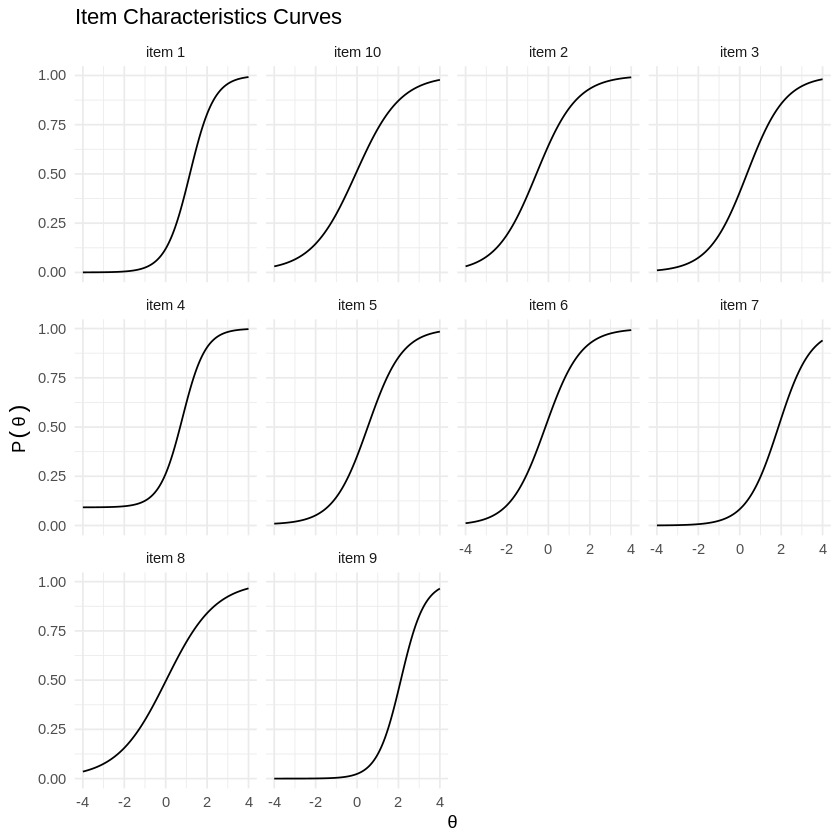

In [ ]:
tracePlot(fit3PL)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


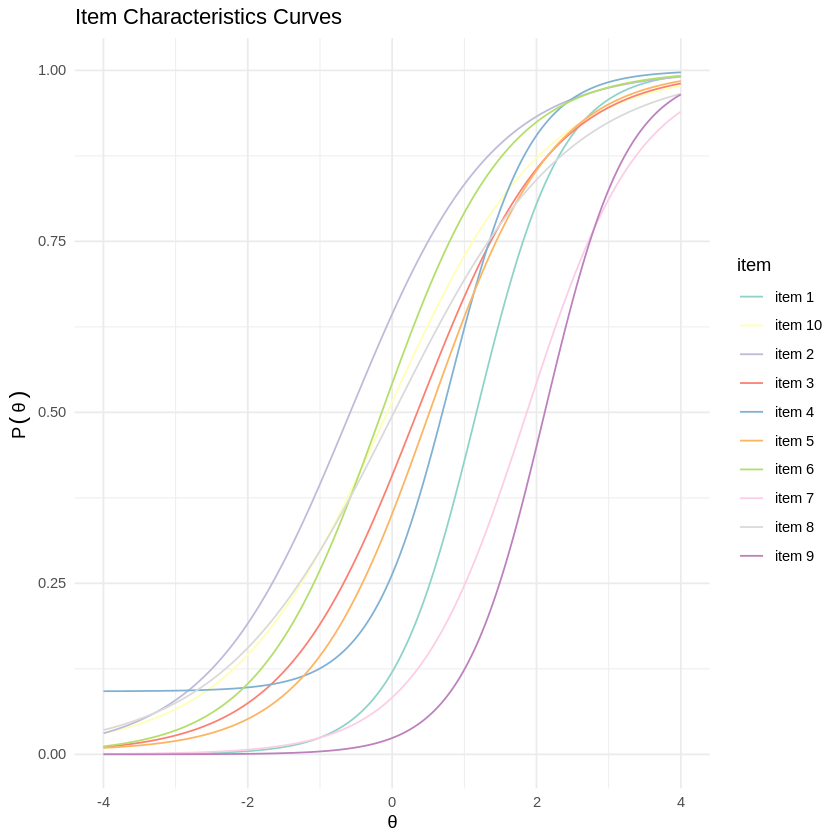

In [ ]:
tracePlot(fit3PL, facet = F, legend = T) + scale_color_brewer(palette = "Set3")


Another way of looking at the quality of each item is by plotting the so-called *item information curves*. Information is a statistical concept that refers to the ability of an item to accurately estimate scores on theta. Item level information clarifies how well each item contributes to score estimation precision with higher levels of information leading to more accurate score estimates.

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggmirt package.
  Please report the issue to the authors.”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


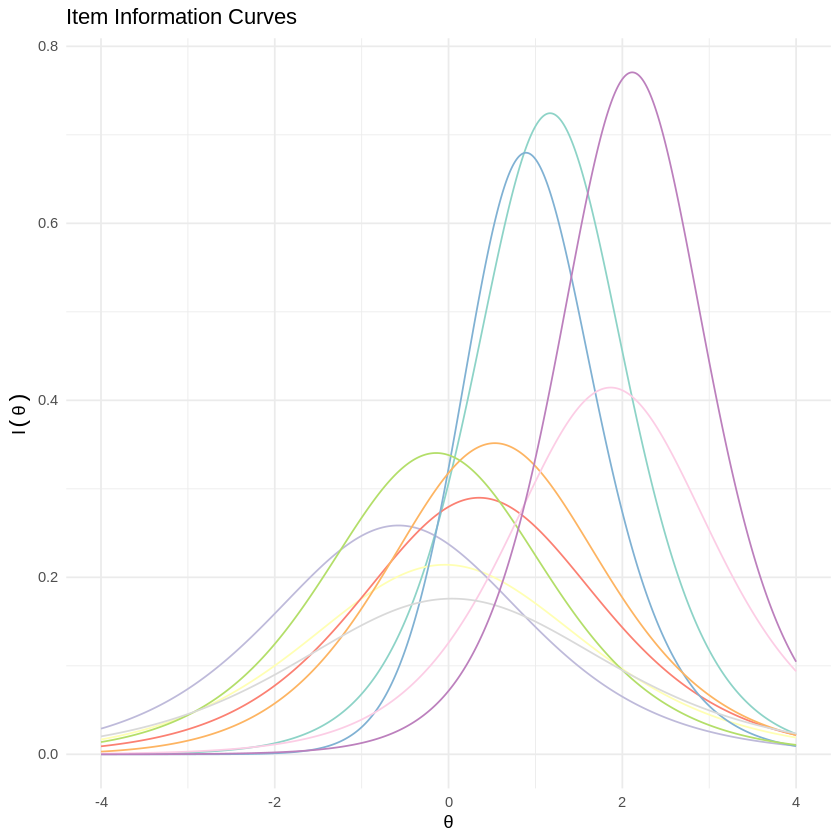

In [ ]:
itemInfoPlot(fit3PL) + scale_color_brewer(palette = "Set3")

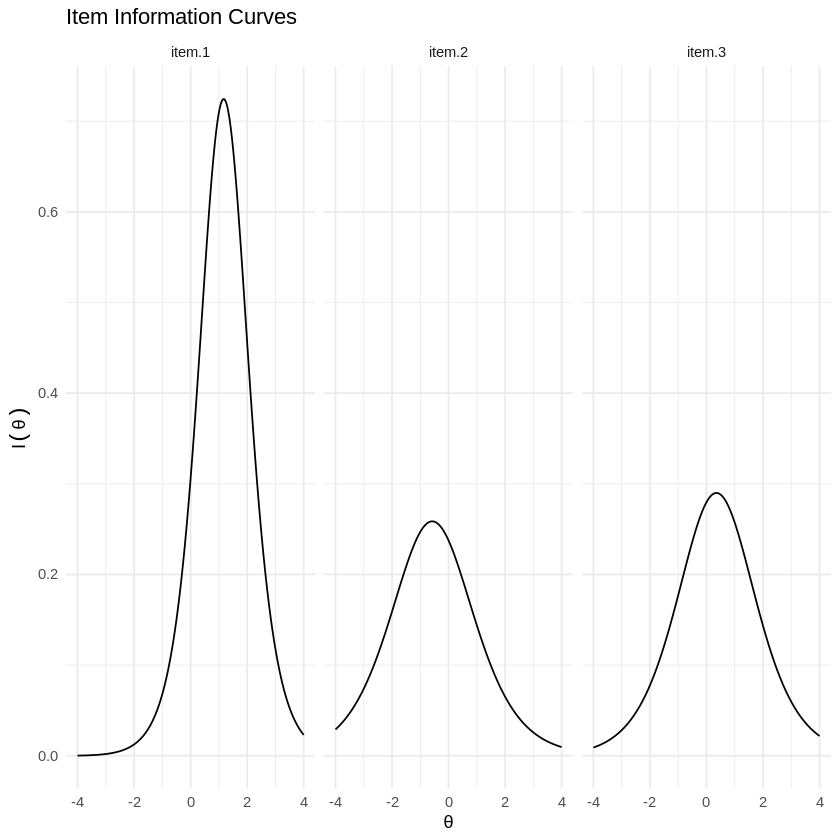

In [ ]:
 itemInfoPlot(fit3PL, items = c(1:3), facet = T) # only few items individually

Here we, see clearly that some items offer most information on higher theta levels whereas others cover the entire range of theta.

### Person fit

Let's now move to person fit. We'll be looking at measures that will allow us to
assess how well each person’s response patterns aligns with the model.
Think about it this way: If a person with a high theta (that is high
latent ability) doesn't answer an easy item correctly, this person's behaviour doesn't fit well with the model. Likewise, if a person with a low
ability answers a very difficult question correctly, this also doesn’t
fit the model. In practice, there will most likely be a few people who
do not fit the model well. However, as long as the number of non-fitting
respondents is low, we are good. We'll look again at infit and
outfit statistics. If less than 5% of the respondents have higher or
lower infit and outfit values than 1.96 and -1.96, we are good.


In [ ]:
head(personfit(fit3PL))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0161479,0.17495415,1.0183924,0.15840392,-0.07323077
2,0.6331922,-0.13275101,0.8411215,-0.49761279,0.56159341
3,0.7456650,-0.19057356,0.8912849,-0.36118534,0.43906570
4,0.7209540,-0.03928867,0.9571507,-0.06374702,0.26012606
5,2.1363674,2.36953932,1.7713727,2.18326557,-2.69486327
6,0.7538809,0.06104147,1.0221023,0.17247403,0.08435612


Let's convert this result into a table with the exact proportions of people within the acceptable infit and outfit ranges.

In [ ]:
personfit(fit3PL) %>%
  reframe(infit.outside = prop.table(table(z.infit > 1.96 | z.infit < -1.96)),
            outfit.outside = prop.table(table(z.outfit > 1.96 | z.outfit < -1.96))) # lower row = non-fitting people

infit.outside,outfit.outside
<table[1d]>,<table[1d]>
0.958,0.98
0.042,0.02


We can also visualise this with a plot.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


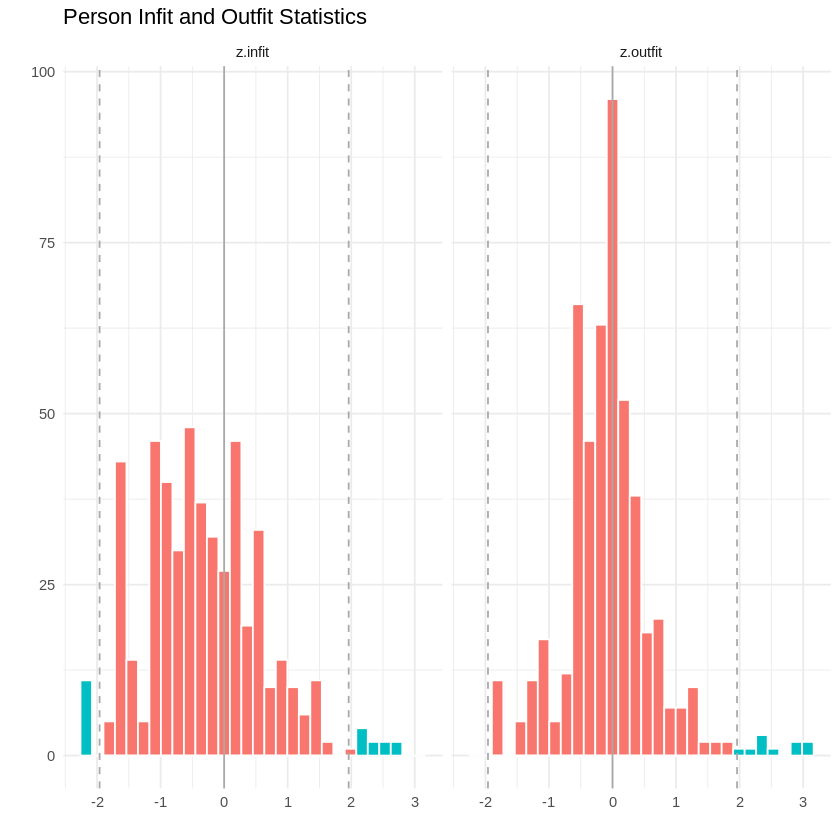

In [ ]:
personfitPlot(fit3PL)

## 2PL model
The 2PL model only differs from the 3PL model in one regard: All items
are assumed to have no guessing probability. So the model only takes
item discrimination (a) and item difficulty into account. The
mathematical form is hence (we simply delete the part before the
fraction):

![P(\\theta\_j) = \\frac{e^{1.7a\_i(\\theta\_j-b\_i)}}{1+e^{1.71a\_i(\\theta\_j-b\_i)}}](https://latex.codecogs.com/png.latex?P%28%5Ctheta_j%29%20%3D%20%5Cfrac%7Be%5E%7B1.7a_i%28%5Ctheta_j-b_i%29%7D%7D%7B1%2Be%5E%7B1.71a_i%28%5Ctheta_j-b_i%29%7D%7D "P(\theta_j) = \frac{e^{1.7a_i(\theta_j-b_i)}}{1+e^{1.71a_i(\theta_j-b_i)}}")

The general procedure to estimate and assess the model remains the same.
Therefore, here we'll only look at the differences and will not repeat all steps
outlined for the 3PL model.

In [ ]:
fit2PL <- mirt(d, 1, itemtype = "2PL")

Iteration: 15, Log-Lik: -2739.232, Max-Change: 0.00010


In [ ]:
fit2PL


Call:
mirt(data = d, model = 1, itemtype = "2PL")

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 15 EM iterations.
mirt version: 1.42.1 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -2739.232
Estimated parameters: 20 
AIC = 5518.465
BIC = 5602.757; SABIC = 5539.276
G2 (1003) = 498.96, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

We can always compare different models that are based on the same data.
Using the function `anova()`, we can check whether the models differ
based on various fit indices and a
![\\chi^2](https://latex.codecogs.com/png.latex?%5Cchi%5E2 "\chi^2")
test. In this case, the 2PL actually fits the data sightly better, but
the difference is not significant.

In [ ]:
anova(fit2PL, fit3PL)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit2PL,5518.465,5539.276,5551.541,5602.757,-2739.232,NA,NA,NA
fit3PL,5537.377,5568.594,5586.991,5663.816,-2738.689,1.087351,10,0.9997476


If we inspect the IRT parameters, the third parameter (c, here denoted
as g) is fixed to 0.

In [ ]:
coef(fit2PL, IRTpars = TRUE, simplify = TRUE)

,a,b,g,u
V1,1.6986898,1.16832911,0,1
V2,1.0183588,-0.58182958,0,1
V3,1.0838719,0.34320588,0,1
V4,1.2750666,0.65685180,0,1
V5,1.1771705,0.51378758,0,1
V6,1.1764403,-0.14552746,0,1
V7,1.2857797,1.86782011,0,1
V8,0.8383685,0.02352994,0,1
V9,1.6842019,2.16221732,0,1
V10,0.9186082,-0.07029652,0,1


The difference between the 3PL and the 2PL model is particularly visible
in the trace plot.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


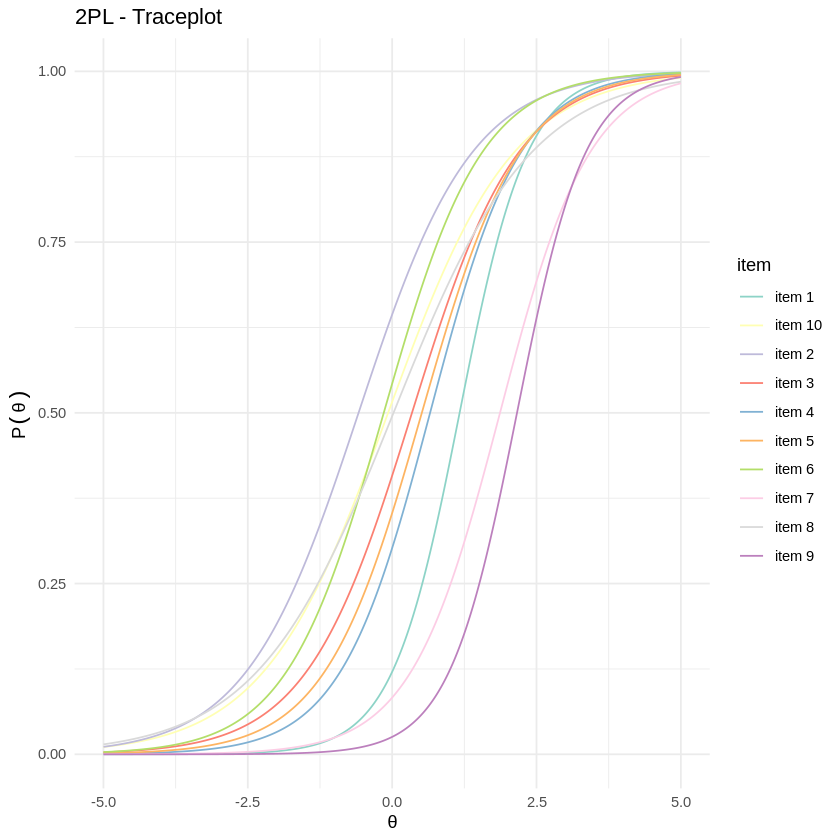

In [ ]:
tracePlot(fit2PL, theta_range = c(-5, 5), facet = F, legend = T) +
  scale_color_brewer(palette = "Set3") +
  labs(title = "2PL - Traceplot")

The curves have different slopes, but they do not have different
asymptotes (yintercepts = guessing probability).

## 1PL or Rasch model

The 1PL model gets rid of yet another parameter: item discrimination. It
basically constrains item discrimination to be equal across all items.
Only item difficulty is allowed to vary. The mathematical form hence
becomes:

![P(\\theta\_j) = \\frac{e^{1.7a(\\theta\_j-b\_i)}}{1+e^{1.71a(\\theta\_j-b\_i)}}](https://latex.codecogs.com/png.latex?P%28%5Ctheta_j%29%20%3D%20%5Cfrac%7Be%5E%7B1.7a%28%5Ctheta_j-b_i%29%7D%7D%7B1%2Be%5E%7B1.71a%28%5Ctheta_j-b_i%29%7D%7D "P(\theta_j) = \frac{e^{1.7a(\theta_j-b_i)}}{1+e^{1.71a(\theta_j-b_i)}}")

Note that there is no subscript for the letter
![a](https://latex.codecogs.com/png.latex?a "a"), because it is
constrained to be the same for all items. The Rasch model (stemming from
a different scholarly tradition) is mathematically equivalent, but is
often expressed slightly differently:

![P(\\beta) = \\frac{e^{(\\beta-\\delta\_i)}}{1+ e^{(\\beta-\\delta\_i)}}](https://latex.codecogs.com/png.latex?P%28%5Cbeta%29%20%3D%20%5Cfrac%7Be%5E%7B%28%5Cbeta-%5Cdelta_i%29%7D%7D%7B1%2B%20e%5E%7B%28%5Cbeta-%5Cdelta_i%29%7D%7D "P(\beta) = \frac{e^{(\beta-\delta_i)}}{1+ e^{(\beta-\delta_i)}}")

It is basically the same as the equation above, but the 1.7 constant is
omitted. Further, the typical notational system uses
![\\delta](https://latex.codecogs.com/png.latex?%5Cdelta "\delta")
instead of ![b](https://latex.codecogs.com/png.latex?b "b") and
![\\beta](https://latex.codecogs.com/png.latex?%5Cbeta "\beta") instead
of ![\\theta](https://latex.codecogs.com/png.latex?%5Ctheta "\theta").

This constrained model is rather an “ideal” measurement model than a
model that can be perfectly fitted to the data. Yet, if we find items
that fit this model sufficiently, it actually has some mathematical
properties that cannot be obtained with less constrained models (e.g.,
2PL or 3PL models). Many scholars favor this
measurement model (particularly those following the Rasch School of
Measurement) for the following reasons:

1.  For this model, the number-correct score is particularly a
    sufficient estimation of theta.
2.  Due to the fixed discrimination parameter, item characteristic
    curves cannot cross. Items thus do not differ in how well they
    differentiate respondents.
3.  Such a model has a so-called specific objectivity: Because the Rasch
    model is based on the idea that items are designed to fit certain
    properties, instead of finding a model that fits the data, item as
    well as person parameter estimates are invariant across samples.
    Person (i.e., proficiency scores) and item parameters (i.e., item
    difficulty) thus will be similar even if only a subset of the item
    pool is used or a different population is studied. This makes it
    very easy to create smaller tests, parallel test or even adaptive
    testing pools.

In [ ]:
fitRasch <- mirt(d, 1, itemtype = "Rasch")
fitRasch

Iteration: 20, Log-Lik: -2746.893, Max-Change: 0.00010



Call:
mirt(data = d, model = 1, itemtype = "Rasch")

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 20 EM iterations.
mirt version: 1.42.1 
M-step optimizer: nlminb 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -2746.893
Estimated parameters: 11 
AIC = 5515.786
BIC = 5562.147; SABIC = 5527.232
G2 (1012) = 514.28, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

In [ ]:
anova(fitRasch, fit2PL)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fitRasch,5515.786,5527.232,5533.978,5562.147,-2746.893,NA,NA,NA
fit2PL,5518.465,5539.276,5551.541,5602.757,-2739.232,15.32166,9,0.08247096


If we inspect the IRT parameters, the first (a, item discrimination) is
constrained to be equal and the third parameter (c, here denoted as g)
is fixed to 0.

In [ ]:
coef(fitRasch, IRTpars = TRUE, simplify = TRUE)

,a,b,g,u
V1,1,1.67252968,0,1
V2,1,-0.61797412,0,1
V3,1,0.37384243,0,1
V4,1,0.79818694,0,1
V5,1,0.59298338,0,1
V6,1,-0.17388752,0,1
V7,1,2.30438427,0,1
V8,1,0.01809406,0,1
V9,1,3.13762348,0,1
V10,1,-0.07275632,0,1


Again, the difference between the 3PL, 2PL and the 1PL (Rasch) model is
particularly visible in the trace plot:

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


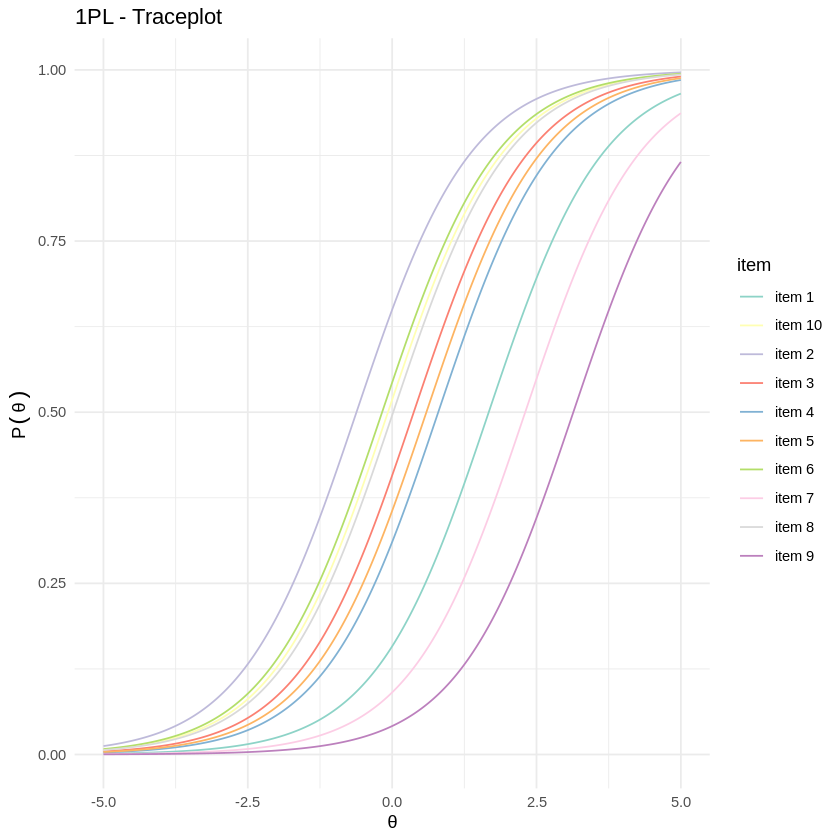

In [ ]:
tracePlot(fitRasch, theta_range = c(-5, 5), facet = F, legend = T) +
  scale_color_brewer(palette = "Set3") +
  labs(title = "1PL - Traceplot")

All items have the exact same slope.


### Extra

We can create smaller, but parallel tests by distributing similar items
into to subset pools. Here, we are simply inspecting the item person map
and trying to form two sets that equally cover the range of the latent
ability.

In [ ]:
subset1 <- d %>%
  select(V2, V10, V3, V4, V7)
subset2 <- d %>%
  select(V6, V8, V5, V1, V9)

test1 <- mirt(subset1, 1, itemtype = "Rasch")

Iteration: 35, Log-Lik: -1481.623, Max-Change: 0.00010


In [ ]:
test2 <- mirt(subset2, 1, itemtype = "Rasch")

Iteration: 42, Log-Lik: -1343.928, Max-Change: 0.00009


We can assess their similarity be plotting two test information curves
on top of each other:

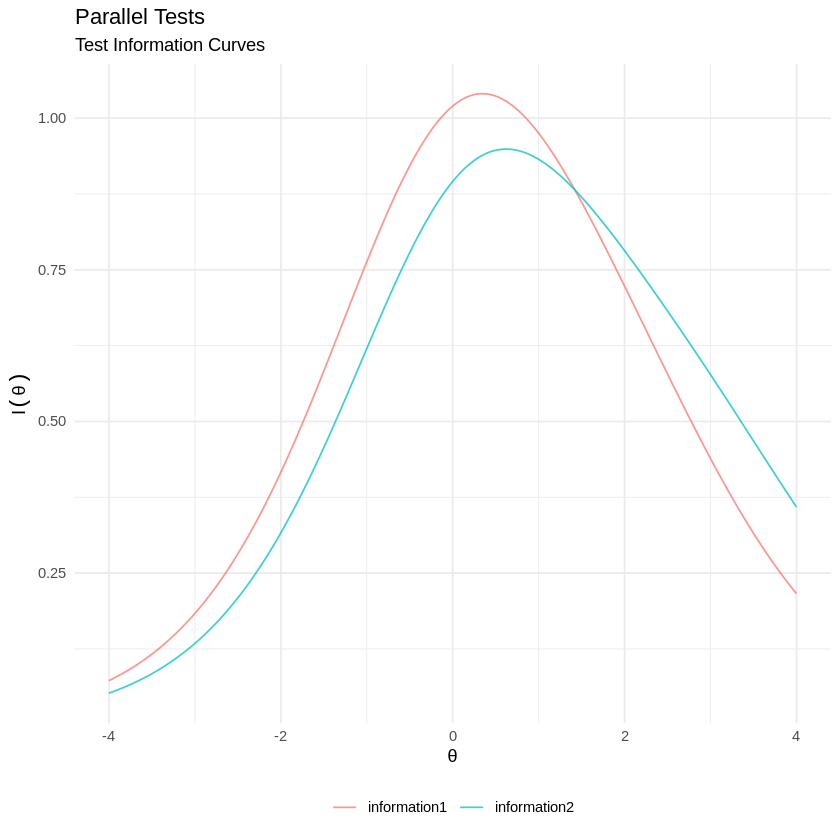

In [ ]:
testInfoCompare(test1, test2)

As we can see, both test sufficiently overlap in their information
curve. So they are very likely to correlate highly with the original
test

In [ ]:
cor.test(fscores(test1), fscores(fitRasch))


	Pearson's product-moment correlation

data:  fscores(test1) and fscores(fitRasch)
t = 41.294, df = 498, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8582740 0.8981538
sample estimates:
      cor 
0.8797522 


In [ ]:
cor.test(fscores(test2), fscores(fitRasch))


	Pearson's product-moment correlation

data:  fscores(test2) and fscores(fitRasch)
t = 38.389, df = 498, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8405774 0.8851290
sample estimates:
     cor 
0.864542 


### **ASSIGNMENT**



So far we've been looking at synthetic data, which was useful for illustrating the models but a bit boring in terms of drawing meaningful conclusions. Let's now consider some 'real' data from a questionnaire on abortion, which was part of the [British Social Attitudes Survey](https://www.icpsr.umich.edu/web/ICPSR/studies/8910), conducted in 1986\*. We have answers for 379 individuals (there were originally 410 participating in the survey, but some of them didn't complete all the questions) who were asked if the law should allow abortion under the circumstances presented for each item:

* *Item 1*: The woman decides on her own that she does not.
* *Item 2*: The couple agree that they do not wish to have a child.
* *Item 3*: The woman is not married and does not wish to marry the man.
* *Item 4*: The couple cannot afford any more children.


The code chunk below shows you how to import the dataset. Your task is to analyse this dataset from an IRT perspective, using the models, metrics, and visualisations that were introduced in this lab. Your analyses should focus on the following points:

1. How do items compare in their ability to differentiate between individuals? Are there items that are more 'difficult' than others? Are all items equally discriminative or are there significant differences between them?
2. How do items compare in terms of guessing probability? Do you think guessing probability is a concern as to how this questionnaire was structured?
3. Which model (Rasch, 2PL, or 3PL) do you think is more suitable for describing this data, and why?
4. Does respondents' behaviour generally align with your preferred model?


Your deliverable for this computer lab will be a short report (shorter than 1 page, plots/tables excluded) summarizing your analyses and results. Feel free to include plots, tables, and/or figures whenever they are useful to support your point(s).

---
\*<small>The items included in the questionnaire refer to views about abortion, couples, and families which may have been present and socially accepted in the 80s but do not reflect **in any way** the views of the staff involved in designing the materials for this course.</small>


In [ ]:
install.packages('ltm')
library(ltm)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: msm

Loading required package: polycor


Attaching package: ‘ltm’


The following object is masked from ‘package:mirt’:

    Science




In [ ]:
abortion_data <- ltm::Abortion

# this is to print some information about the dataset
descript(abortion_data)


Descriptive statistics for the 'abortion_data' data-set

Sample:
 4 items and 379 sample units; 0 missing values

Proportions for each level of response:
            0      1   logit
Item 1 0.5620 0.4380 -0.2493
Item 2 0.4063 0.5937  0.3791
Item 3 0.3641 0.6359  0.5575
Item 4 0.3826 0.6174  0.4786


Frequencies of total scores:
       0  1  2  3   4
Freq 103 33 37 65 141


Point Biserial correlation with Total Score:
       Included Excluded
Item 1   0.8164   0.6673
Item 2   0.8674   0.7541
Item 3   0.8769   0.7737
Item 4   0.8355   0.7025


Cronbach's alpha:
                  value
All Items        0.8707
Excluding Item 1 0.8573
Excluding Item 2 0.8223
Excluding Item 3 0.8148
Excluding Item 4 0.8430


Pairwise Associations:
  Item i Item j p.value
1      1      4  <2e-16
2      1      3  <2e-16
3      2      4  <2e-16
4      1      2  <2e-16
5      2      3  <2e-16
6      3      4  <2e-16

